## BKT model

In [3]:
# Import all required packages including pyBKT.models.Model!
import numpy as np
import pandas as pd
from pyBKT.models import Model
import matplotlib.pyplot as plt

### Basic model creation and evaluation

In [4]:
# initialize the model with an optional seed and number of git initializations
model = Model(seed = 42, num_fits = 1)

In [5]:
model.fetch_dataset('https://raw.githubusercontent.com/CAHLR/pyBKT-examples/master/data/as.csv', '.')
model.fetch_dataset('https://raw.githubusercontent.com/CAHLR/pyBKT-examples/master/data/ct.csv', '.')

In [6]:
ct_df = pd.read_csv('ct.csv', encoding = 'latin')
print(ct_df.columns)
ct_df.head(5)

Index(['Unnamed: 0', 'Row', 'Anon Student Id', 'Problem Hierarchy',
       'Problem Name', 'Problem View', 'Step Name', 'Step Start Time',
       'First Transaction Time', 'Correct Transaction Time', 'Step End Time',
       'Step Duration (sec)', 'Correct Step Duration (sec)',
       'Error Step Duration (sec)', 'Correct First Attempt', 'Incorrects',
       'Hints', 'Corrects', 'KC(Default)', 'Opportunity(Default)'],
      dtype='object')


Unnamed: 0   Row Anon Student Id  \
0        1576  1927           745Yh   
1        1580  1931           745Yh   
2        1596  1947           745Yh   
3        1597  1948           745Yh   
4        1612  1963           745Yh   

                                   Problem Hierarchy Problem Name  \
0  Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2   RATIO2-001   
1  Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2   RATIO2-001   
2  Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2   RATIO2-012   
3  Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2   RATIO2-012   
4  Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2   RATIO2-054   

   Problem View                     Step Name        Step Start Time  \
0             1  SimplifiedNumeratorQuantity1  2006-11-14 10:18:00.0   
1             1  SimplifiedNumeratorQuantity2  2006-11-14 10:18:11.0   
2             1  SimplifiedNumeratorQuantity1  2006-11-14 10:50:52.0   
3             1  SimplifiedNumeratorQuantity2  2006-11-14 10:51:11.0   
4             1  SimplifiedNumeratorQuantity2  2006-11-28 09:53:43.0   

  First Transaction Time Correct Transaction Time          Step End Time  \
0  2006-11-14 10:18:05.0    2006-11-14 10:18:05.0  2006-11-14 10:18:05.0   
1  2006-11-14 10:18:17.0    2006-11-14 10:18:34.0  2006-11-14 10:18:34.0   
2  2006-11-14 10:50:57.0    2006-11-14 10:51:11.0  2006-11-14 10:51:11.0   
3  2006-11-14 10:51:14.0    2006-11-14 10:51:14.0  2006-11-14 10:51:14.0   
4  2006-11-28 09:53:47.0    2006-11-28 09:53:56.0  2006-11-28 09:53:56.0   

   Step Duration (sec)  Correct Step Duration (sec)  \
0              5.00000                      5.00000   
1             23.00000                          NaN   
2             18.00000                          NaN   
3              3.00000                      3.00000   
4             13.00000                          NaN   

   Error Step Duration (sec)  Correct First Attempt  Incorrects  Hints  \
0                        NaN                      1           0      0   
1                   23.00000                      0           1      0   
2                   18.00000                      0           1      0   
3                        NaN                      1           0      0   
4                   13.00000                      0           1      0   

   Corrects          KC(Default)  Opportunity(Default)  
0         1  Calculate unit rate                     1  
1         1  Calculate unit rate                     2  
2         1  Calculate unit rate                     3  
3         1  Calculate unit rate                     4  
4         1  Calculate unit rate                     5

In [ ]:
# -1 (no response), 0 (incorrect), 1 (correct)

In [7]:
as_df = pd.read_csv('as.csv', encoding = 'latin', low_memory = False)
print(as_df.columns)
as_df.head(5)

Index(['order_id', 'assignment_id', 'user_id', 'assistment_id', 'problem_id',
       'original', 'correct', 'attempt_count', 'ms_first_response',
       'tutor_mode', 'answer_type', 'sequence_id', 'student_class_id',
       'position', 'type', 'base_sequence_id', 'skill_id', 'skill_name',
       'teacher_id', 'school_id', 'hint_count', 'hint_total', 'overlap_time',
       'template_id', 'answer_id', 'answer_text', 'first_action',
       'bottom_hint', 'opportunity', 'opportunity_original'],
      dtype='object')


order_id  assignment_id  user_id  assistment_id  problem_id  original  \
0  33022537         277618    64525          33139       51424         1   
1  33022709         277618    64525          33150       51435         1   
2  35450204         220674    70363          33159       51444         1   
3  35450295         220674    70363          33110       51395         1   
4  35450311         220674    70363          33196       51481         1   

   correct  attempt_count  ms_first_response tutor_mode  ... hint_count  \
0        1              1              32454      tutor  ...          0   
1        1              1               4922      tutor  ...          0   
2        0              2              25390      tutor  ...          0   
3        1              1               4859      tutor  ...          0   
4        0             14              19813      tutor  ...          3   

   hint_total  overlap_time  template_id answer_id  answer_text  first_action  \
0           3         32454        30799       NaN           26             0   
1           3          4922        30799       NaN           55             0   
2           3         42000        30799       NaN           88             0   
3           3          4859        30059       NaN           41             0   
4           4        124564        30060       NaN           65             0   

  bottom_hint  opportunity  opportunity_original  
0         NaN            1               1.00000  
1         NaN            2               2.00000  
2         NaN            1               1.00000  
3         NaN            2               2.00000  
4     0.00000            3               3.00000  

[5 rows x 30 columns]

In [8]:
# fit a BKT model to every skill in cognitive tutor dataset
model.fit(data_path = 'ct.csv')

In [7]:
# train multiple skills specified by a list of skill names or a REGEX match for each skill using the skills parameter
model.fit(data_path = 'ct.csv', skills = ".*fraction.*")
print("Fitted Skills:\n%s" % '\n'.join(model.coef_.keys()))

Fitted Skills:
Plot non-terminating improper fraction
Plot terminating proper fraction
Calculate part in proportion with fractions
Calculate total in proportion with fractions


In [19]:
# Evaluate with the default RMSE then specify AUC.
model.fit(data_path = 'ct.csv')
training_rmse = model.evaluate(data = ct_df)
training_auc = model.evaluate(data_path = "ct.csv", metric = 'auc')
print ("Training RMSE: %f" % training_rmse)
print ("Training AUC: %f" % training_auc)

Training RMSE: 0.454291
Training AUC: 0.706822


In [10]:
# We can even define our own metric
def mae(true_vals, pred_vals):
  """ Calculates the mean absolute error. """
  return np.mean(np.abs(true_vals - pred_vals))

training_mae = model.evaluate(data_path = 'ct.csv', metric = mae)
print("Training MAE: %f" % training_mae)

Training MAE: 0.413333


### Model prediction

In [20]:
# Note again that the REGEX expression below trains BKT models on all
# skills containing the word fraction!
model.fit(data_path = 'ct.csv', skills = ".*fraction.*")
preds = model.predict(data_path = 'ct.csv')
preds[['Anon Student Id', 'KC(Default)', 'Correct First Attempt', 
       'correct_predictions', 'state_predictions']].head(5)

Anon Student Id                             KC(Default)  \
773         0I891Gg  Plot non-terminating improper fraction   
774         0I891Gg                  Plot imperfect radical   
775         0I891Gg        Plot terminating proper fraction   
776         0I891Gg                                 Plot pi   
777         0I891Gg        Plot terminating proper fraction   

     Correct First Attempt  correct_predictions  state_predictions  
773                      0              0.50089            0.73886  
774                      0              0.50000            0.50000  
775                      0              0.51959            0.54734  
776                      1              0.50000            0.50000  
777                      1              0.46111            0.38216

In [21]:
# Let's sanity check that we have only trained on the skills that we 
# specified in the call to fit! Note that while it is possible for a 
# BKT prediction to be 0.5 exactly, it is unlikely.
preds[preds['correct_predictions'] != 0.5]['KC(Default)'].unique()

array(['Plot non-terminating improper fraction',
       'Plot terminating proper fraction',
       'Calculate part in proportion with fractions',
       'Calculate total in proportion with fractions'], dtype=object)

In [22]:
# Let's manually calculate the RMSE of the correct predictions 
# and ensure that it is the same as a call to the evaluate function.
def rmse(y_true, y_pred):
  """ Returns the root-mean squared error. """
  return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Filter out the data for which we did not train!
preds_filtered = preds[preds['KC(Default)'].str.contains('fraction')]
manual_training_rmse = rmse(preds_filtered['Correct First Attempt'],
                            preds_filtered['correct_predictions'])
manual_training_rmse

0.44058121514471155

In [23]:
# We use model.evaluate to accomplish the same thing!
# You should receive an RMSE that is identical to the above
# manually calculated RMSE.
model.evaluate(data = ct_df)

0.44058121514470583

### Model cross-validation and variants

In [24]:
# folds is an optional parameter
model.crossvalidate(data_path = 'ct.csv', folds = 5)

rmse
skill                                               
Plot non-terminating improper fraction       0.48198
Plot imperfect radical                       0.43818
Plot terminating proper fraction             0.49607
Plot pi                                      0.46972
Plot whole number                            0.28949
Plot decimal - thousandths                   0.47361
Calculate unit rate                          0.48259
Calculate part in proportion with fractions  0.42732
Calculate total in proportion with fractions 0.42419
Finding the intersection, Mixed              0.49991
Finding the intersection, GLF                0.49093
Finding the intersection, SIF                0.49119

In [25]:
# for one particular skill, it gives better evaluation of true model performance during test time than the training loss
skill = 'Calculations with Similar Figures'
metric = 'auc'

simple_cv = model.crossvalidate(data = as_df, skills = skill, 
                                metric = metric)
simple_cv

auc
skill                                    
Calculations with Similar Figures 0.59503

In [26]:
# fits a different guess/slip rate for each class
multigs_cv = model.crossvalidate(data_path = 'as.csv', skills = skill,
                                 multigs = True, metric = metric)
multigs_cv

auc
skill                                    
Calculations with Similar Figures 0.67353

In [27]:
# fits a different learn rate
multilearn_cv = model.crossvalidate(data_path = 'as.csv', skills = skill,
                                    multilearn = True, forgets = True, 
                                    metric = metric)
multilearn_cv

auc
skill                                    
Calculations with Similar Figures 0.65717

In [28]:
# The multiprior model generates different priors based on the first 
# response of each student.
multiprior_cv = model.crossvalidate(data_path = 'as.csv', skills = skill,
                                    multiprior = True, metric = metric,
                                    folds = 3)
multipair_cv = model.crossvalidate(data_path = 'as.csv', skills = skill,
                                   multipair = True, metric = metric,
                                   folds = 3)
pd.concat([multiprior_cv, multipair_cv], axis = 0)

auc
skill                                    
Calculations with Similar Figures 0.59109
Calculations with Similar Figures 0.57042

In [29]:
# We combine the fifth parameter, forgets, with the previous multilearn
# and multiguess/slip models for a combo model.
combo_cv = model.crossvalidate(data_path = 'as.csv', skills = skill,
                               forgets = True, multilearn = True, 
                               multigs = True, metric = metric)
combo_cv

auc
skill                                    
Calculations with Similar Figures 0.70166

### Model parameter initialization and visualization

In [30]:
# initialize the prior parameter to le-3 for the Box and Wisker skill
skill = 'Box and Whisker'

model.coef_ = {skill: {'prior': 1e-40}}
model.coef_

{'Box and Whisker': {'prior': 1e-40}}

In [12]:
# train the model with the pre-intialized parameters
model.fit(data_path = 'as.csv', skills = skill, multigs = True)
low_prior_auc = model.evaluate(data_path = 'as.csv', metric = 'auc')

# obtain the prior value by indexing into the model.coef_
print("Fitted Prior Value: %f" % model.coef_[skill]['prior'])
print("Training AUC: %f" % low_prior_auc)

Fitted Prior Value: 0.000000
Training AUC: 0.674790


In [15]:
# initialize the prior to be more resonable
model.coef_ = {skill: {'prior': 0.5}}
model.fit(data_path = 'as.csv', skills = skill, multigs = True)
normal_prior_auc = model.evaluate(data_path = 'as.csv', metric = 'auc')

# Print the fitted prior value and RMSE.
print("Fitted Prior Value: %f" % model.coef_[skill]['prior'])
print("Training AUC: %f" % normal_prior_auc)

Fitted Prior Value: 0.687773
Training AUC: 0.698413


In [ ]:
# visualize the parameter
model.fit(data_path = 'as.csv', skills = skill,
          forgets = True, multilearn = True, 
          multigs = True)
model.params()

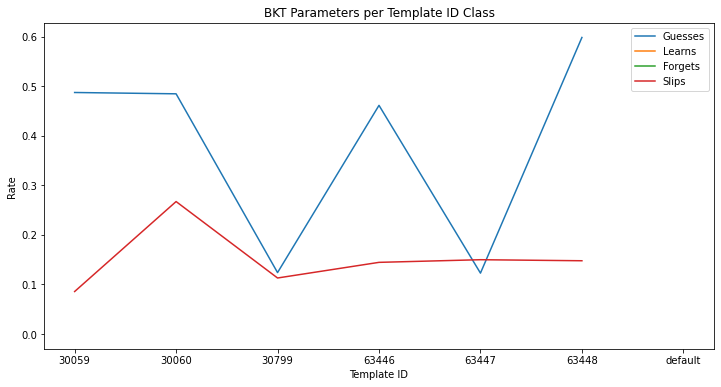

In [16]:
# disable the warnings
import warnings
warnings.simplefilter(action='ignore')

# Plot the learns, forgets, slips and guesses for each of the classes.
params = model.params()
plt.figure(figsize = (12, 6))
plt.plot(params.loc[(skill, 'guesses')], label = 'Guesses')
plt.plot(params.loc[(skill, 'learns')], label = 'Learns')
plt.plot(params.loc[(skill, 'forgets')], label = 'Forgets')
plt.plot(params.loc[(skill, 'slips')], label = 'Slips')
plt.xlabel('Template ID')
plt.ylabel('Rate')
plt.title('BKT Parameters per Template ID Class')
plt.legend();

### Extended data and model configuration

In [17]:
config = {'multigs': True,
          'multilearn': True,
          'skills': ['Box and Whisker', 'Circle Graph'],
          'forgets': True,
          'metric': 'accuracy',
          'folds': 4,
          'seed': 42 * 42}
model.crossvalidate(data_path = 'as.csv', **config)

accuracy
skill                    
Circle Graph      0.68533
Box and Whisker   0.76148

In [31]:
defaults = {'order_id': 'custom_order', 
            'skill_name': 'custom_skill', 
            'correct': 'custom_answer'}

defaults['multigs'] = 'custom_gs_classes'

# final column mapping
defaults

{'order_id': 'custom_order',
 'skill_name': 'custom_skill',
 'correct': 'custom_answer',
 'multigs': 'custom_gs_classes'}

In [32]:
# use the mapping with the modified CogTutor dataset with the names
columns = ['Row', 'Anon Student Id', 'KC(Default)', 
           'Correct First Attempt', 'Problem Name']
my_df = ct_df[columns]
my_df.columns = ['custom_order', 'Anon Student Id',
                 'custom_skill', 'custom_answer',
                 'custom_gs_classes']
my_df['custom_skill'] += ' (Custom)'
my_df.head(5)

custom_order Anon Student Id  \
773        112149         0I891Gg   
774        112151         0I891Gg   
775        112156         0I891Gg   
776        112157         0I891Gg   
777        112159         0I891Gg   

                                        custom_skill  custom_answer  \
773  Plot non-terminating improper fraction (Custom)              0   
774                  Plot imperfect radical (Custom)              0   
775        Plot terminating proper fraction (Custom)              0   
776                                 Plot pi (Custom)              1   
777        Plot terminating proper fraction (Custom)              1   

    custom_gs_classes  
773     RATIONAL1-014  
774     RATIONAL1-041  
775     RATIONAL1-104  
776     RATIONAL1-122  
777     RATIONAL1-180

In [ ]:
# crossvalidate/fit given these defalut column mappings
model.crossvalidate(data = my_df, metric = 'auc',
                    defaults = defaults)

### Summary

In [ ]:
def mae(true_vals, pred_vals):
  """ Calculates the mean absolute error. """
  return np.mean(np.abs(true_vals - pred_vals))

# This code fetches data, fits, predicts, evaluates and crossvalidates
# a BKT model on all skills in Cognitive Tutor. It uses the mean absolute
# error as the desired error metric.
model = Model(seed = 42, num_fits = 5)
model.fit(data_path = 'ct.csv')
preds_df = model.predict(data_path = 'ct.csv')
mae_error = model.evaluate(data_path = 'ct.csv', metric = mae)
cv_errors = model.crossvalidate(data_path = 'ct.csv', metric = mae)
params_df = model.params()
print("Training MAE: %f" % mae_error)
cv_errors

## IRT

In [3]:
!pip install pystan
import pandas as pd
from pprint import pprint
import pystan
from scipy.special import expit
from matplotlib import pyplot as plt
from numpy.random import normal, randint, binomial, choice
from numpy import percentile, concatenate, array, linspace, append
%matplotlib inline

     |████████████████████████████████| 91 kB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 574 kB 3.2 MB/s eta 0:00:01     |███████████████▍                | 276 kB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 196 kB 6.0 MB/s eta 0:00:01
     |████████████████████████████████| 37.4 MB 384 kB/s eta 0:00:01    |▏                               | 204 kB 5.1 MB/s eta 0:00:08     |███▌                            | 4.1 MB 5.1 MB/s eta 0:00:07     |████████                        | 9.3 MB 5.7 MB/s eta 0:00:05     |████████▍                       | 9.8 MB 5.7 MB/s eta 0:00:05     |████████▉                       | 10.3 MB 5.7 MB/s eta 0:00:05     |████████████▎                   | 14.3 MB 5.7 MB/s eta 0:00:05


In [8]:
def generate_binary_irt_data(sim_input):
    # simulate abilities, difficulties, and subject/item combinations
    sim_ability = normal(loc=0,
                         scale=sim_input['sigma_ability'],
                         size=sim_input['S'])
    sim_difficulty = normal(loc=sim_input['mu_difficulty'],
                            scale=sim_input['sigma_difficulty'],
                            size=sim_input['I'])
    sim_subject = randint(low=0,
                          high=sim_input['S'],
                          size=sim_input['R'])
    sim_item = randint(low=0,
                       high=sim_input['I'],
                       size=sim_input['R'])
    # work out success probabilities
    sim_success_probabilities = expit(sim_ability[sim_subject] -
                                      sim_difficulty[sim_item])
    # simulate grades
    sim_grade = binomial(n=1,
                         p=sim_success_probabilities,
                         size=sim_input['R'])
    # Dictionary of data to give to STAN
    sim_data = {
        'grade': sim_grade,
        'subject': sim_subject + 1,
        'item': sim_item + 1,
    }
    sim_data.update({i: binary_sim_input[i] for i in ['R', 'I', 'S']})
    recoverables = {
        'ability': sim_ability,
        'difficulty': sim_difficulty,
    }
    recoverables.update({i: binary_sim_input[i] for i in ['sigma_ability',
                                                          'mu_difficulty',
                                                          'sigma_difficulty']})
    return sim_data, recoverables

# define some input data
binary_sim_input = {'R': 10000,
                    'I': 15,
                    'S': 15,
                    'sigma_ability': 1,
                    'sigma_difficulty': 2,
                    'mu_difficulty': -1}
binary_sim_data, binary_sim_recoverables = generate_binary_irt_data(binary_sim_input)
# print results
print('Here is our randomly generated data:')
pprint(binary_sim_data)  # pprint makes the dictionary print nicely

Here is our randomly generated data:
{'I': 15,
 'R': 10000,
 'S': 15,
 'grade': array([0, 1, 1, ..., 1, 0, 1]),
 'item': array([ 2, 14, 14, ..., 14,  2, 15]),
 'subject': array([ 2, 10,  9, ..., 14,  4, 11])}


In [9]:
# fit model
binary_fit = binary_irt_model.sampling(data=binary_sim_data, iter=2000, chains=4)
# extract parameters
binary_params = binary_fit.extract()
# print fit summary
print(binary_fit)
# draw summary plot
f = binary_fit.plot()
f.set_size_inches(18, 10)
plt.tight_layout()

NameError: name 'binary_irt_model' is not defined